# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Johansen Sihombing
- **Email:** johansensihombing099@students.usu.ac.id
- **ID Dicoding:** johansen080102

## Menentukan Pertanyaan Bisnis

### Informasi Dataset

Nama Dataset : Bike Sharing Dataset (day.csv)

Ringkasan informasi yang saya ringkas :

1.   Dataset tentang penyewaan/peminjaman sepeda berbagi, yang dipengaruhi oleh faktor lingkungan dan musiman seperti cuaca, hari dalam seminggu, dan musim.  
2.   Dataset berisi catatan historis selama dua tahun (2011 dan 2012) dari sistem Capital Bikeshare di Washington D.C., AS. (Sumber: Kaggle)
3.   Dataset digunakan untuk melakukan prediksi jumlah penyewaan sepeda secara harian berdasarkan faktor lingkungan dan musiman, serta untuk mendeteksi acara atau anomali yang mempengaruhi jumlah penyewaan.



### Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda ?
- Bagaimana pengaruh hari libur/hari kerja terhadap jumlah peminjaman sepeda ?
- Bagaimana pengaruh suhu (temperature) tertentu terhadap jumlah peminjaman sepeda ?

## Import Semua Packages/Library yang Digunakan

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [225]:
day_df = pd.read_csv("./data/day.csv")

### Assessing Data

#### Cek Missing Values

In [226]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing values dalam dataset ini.

#### Cek Duplikasi Data

In [227]:
print("Jumlah Duplikasi Data:", day_df.duplicated().sum())

Jumlah Duplikasi Data: 0


Dataset tidak memiliki duplikasi.

#### Cek Tipe Data

In [228]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [229]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kolom dteday berisikan tanggal yang sebaiknya diubah tipe datanya menjadi datetime dan beberapa data kategorial yang berisi int lebih baik diganti menjadi data category. Baiknya dilakukan pada tahap Data Cleansing

#### Cek Outlier

In [230]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Data terlihat tidak ada masalah. Namun untuk memastikan dapat dicek untuk lebih pasti dengan IQR pada fitur-fitur numerik yang akan sangat diperlukan. Karena yang akan fokus saya analisis adalah musim, jenis keterangan hari (holiday, weekday, workday), dan suhu (temperature). Maka saya hanya akan mencek fitur suhu (temperature) karena dua lainnya merupakan tipe data object atau kategorial.

In [231]:
q25, q75 = np.percentile(day_df["temp"], 25), np.percentile(day_df["temp"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in day_df["temp"] if x < minimum or x > maximum]

In [232]:
print(outliers)

[]


Dapat dilihat bahwa tidak ada otlier pada kolom suhu (temperature)

#### Invalid value

Karena data musim dan jenis hari merupakan kategorial dan memiliki kategori yang telah ditetapkan harus dipastikan bahwa semua datanya valid.
Contoh : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
Pastikan bahwa tidak ada nilai selain kategori yang telah ditentukan

In [233]:
day_df["season"].unique()

array([1, 2, 3, 4])

Kolom musim tidak ada data invalid.

In [234]:
day_df["holiday"].unique()

array([0, 1])

Kolom holiday tidak ada data invalid, karena hanya ada 0 dan 1 yang artinya hari libur atau tidak.

In [235]:
day_df["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5])

Kolom weekday tidak ada data invalid, karena hanya ada 7 jenis hari yakni senin-minggu.

In [236]:
day_df["workingday"].unique()

array([0, 1])

Kolom workingday tidak ada data invalid, karena hanya ada 0 dan 1 yang artinya hari kerja atau tidak.

### Cleaning Data

Terdapat tipe data yang kurang tepat dan ada baiknya diperbaiki sebelum memasuki EDA dan Visualisasi Data

In [237]:
day_df['dteday']=pd.to_datetime(day_df.dteday)

In [238]:
day_df['season']=day_df.season.astype('category')
day_df['yr']=day_df.yr.astype('category')
day_df['mnth']=day_df.mnth.astype('category')
day_df['holiday']=day_df.holiday.astype('category')
day_df['weekday']=day_df.weekday.astype('category')
day_df['workingday']=day_df.workingday.astype('category')
day_df['weathersit']=day_df.weathersit.astype('category')

In [239]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

## Exploratory Data Analysis (EDA)

In [240]:
day_df.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Left-skewed distribution karena mean < median. Namun distribusi terlihat cukup simetris karena mean dan median memiliki selisih yang sangat kecil.

In [241]:
numeric_cols = day_df.select_dtypes(include=['int64', 'float64']).columns
day_df[numeric_cols].corr()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
temp,0.150580,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.628830,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


Kolom Temp tidak memiliki korelasi yang kuat dengan kolom numerik yang lainnya.

### Pengaruh Musim Terhadap Jumlah Peminjaman Sepeda

Mengganti nama musim menjadi string agar lebih informatif dan mudah dipahami.

In [242]:
nama_musim = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [243]:
day_df['season'] = day_df['season'].map(nama_musim)

In [244]:
day_df.groupby('season')['cnt'].agg(total_peminjaman='sum')

,total_peminjaman
season,
Springer,471348
Summer,918589
Fall,1061129
Winter,841613


**Musim Fall (Gugur)** merupakan musim dengan jumlah peminjaman sepeda terbanyak.

In [245]:
day_df.groupby('season')['cnt'].agg(total_rentals='sum', average_rentals='mean')


,total_rentals,average_rentals
season,,
Springer,471348,2604.132597
Summer,918589,4992.331522
Fall,1061129,5644.303191
Winter,841613,4728.162921


Musim Fall (Gugur) merupakan rata-rata tertinggi jumlah peminjaman sepeda dari tiap musim

### Pengaruh Holiday/Working Day/Week Day Terhadap Jumlah Peminjaman Sepeda

In [246]:
day_df.groupby('holiday')['cnt'].agg(total='sum', average='mean')

,total,average
holiday,,
0,3214244,4527.104225
1,78435,3735.000000


Peminjaman sepeda jauh lebih banyak saat tidak **holiday**.

In [247]:
day_df.groupby('workingday')['cnt'].agg(total='sum', average='mean')

,total,average
workingday,,
0,1000269,4330.168831
1,2292410,4584.820000


Selaras dengan data diatas. Peminjaman sepeda jauh lebih banyak saat **workingday**.

In [248]:
day_df.groupby('weekday')['cnt'].agg(total='sum', average='mean')

,total,average
weekday,,
0,444027,4228.828571
1,455503,4338.123810
2,469109,4510.663462
3,473048,4548.538462
4,485395,4667.259615
5,487790,4690.288462
6,477807,4550.542857


Data ini sedikit ambigu karena tidak ada keterangan yang menjelaskan urutan kategorial data ke nama hari yang sebenarnya, namun melihat standar kalender amerika hari dimulai dari minggu, maka dapat diasumsikan bahwa pemakaian sepeda **paling banyak digunakan di Jumat dan diikuti Kamis dan Sabtu serta yang terendah hari Minggu.**

### Pengaruh Suhu (Temperature) Terhadap Jumlah Peminjaman Sepeda

In [249]:
day_df.groupby('temp')['cnt'].agg(total='sum', average='mean')


,total,average
temp,,
0.059130,981,981.0
0.096522,986,986.0
0.097391,1416,1416.0
0.107500,2368,2368.0
0.127500,1529,1529.0
...,...,...
0.834167,5463,5463.0
0.838333,3846,3846.0
0.848333,3387,3387.0


In [250]:
day_df.groupby('temp')['cnt'].agg(total='sum', average='mean').sort_values(by='total', ascending=False).head(10)


,total,average
temp,,
0.564167,26439,6609.750000
0.635000,26012,5202.400000
0.649167,24216,6054.000000
0.514167,22963,7654.333333
0.710833,22806,5701.500000
0.696667,22647,5661.750000
0.437500,22276,5569.000000
0.484167,22138,5534.500000
0.554167,21891,7297.000000


Range Temperature dilihat berdasarkan Pengguna 10 Terbanyak : **0.437500-0.710833**

## Visualization & Explanatory Analysis

### Pertanyaan 1:

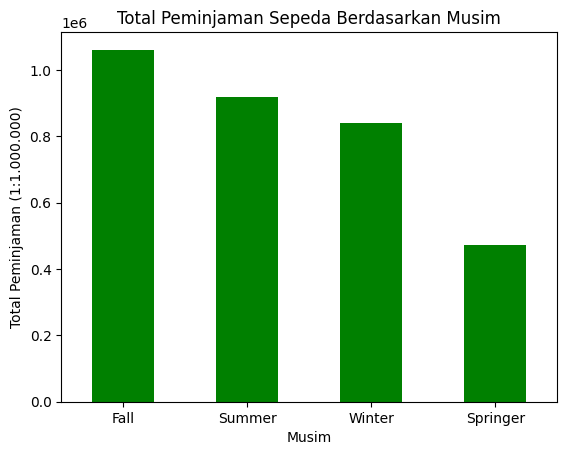

In [251]:
peminjaman_musim = day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)

peminjaman_musim.plot(kind='bar', color='green')
plt.title('Total Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman (1:1.000.000)')
plt.xticks(rotation=0)

plt.show()

### Pertanyaan 2:

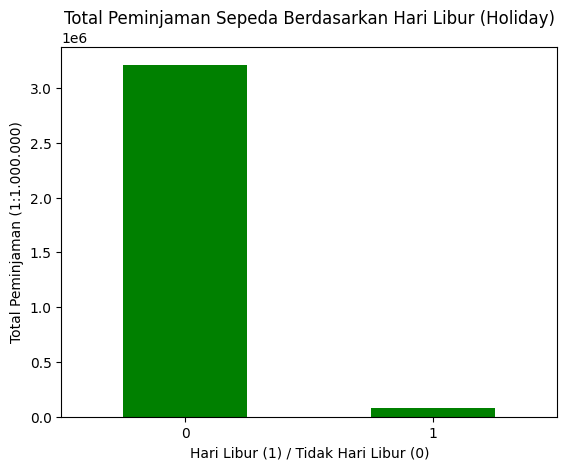

In [252]:
peminjaman_holiday = day_df.groupby('holiday')['cnt'].sum().sort_values(ascending=False)

bars = peminjaman_holiday.plot(kind='bar', color='green')
plt.title('Total Peminjaman Sepeda Berdasarkan Hari Libur (Holiday)')
plt.xlabel('Hari Libur (1) / Tidak Hari Libur (0)')
plt.ylabel('Total Peminjaman (1:1.000.000)')
plt.xticks(rotation=0)

plt.show()


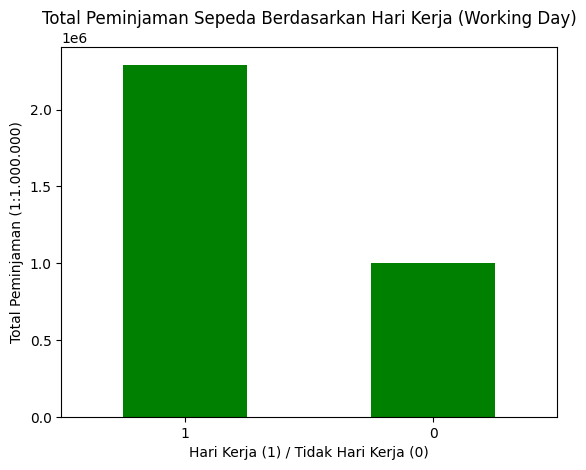

In [253]:
peminjaman_working = day_df.groupby('workingday')['cnt'].sum().sort_values(ascending=False)

bars = peminjaman_working.plot(kind='bar', color='green')
plt.title('Total Peminjaman Sepeda Berdasarkan Hari Kerja (Working Day)')
plt.xlabel('Hari Kerja (1) / Tidak Hari Kerja (0)')
plt.ylabel('Total Peminjaman (1:1.000.000)')
plt.xticks(rotation=0)

plt.show()

### Pertanyaan 3:

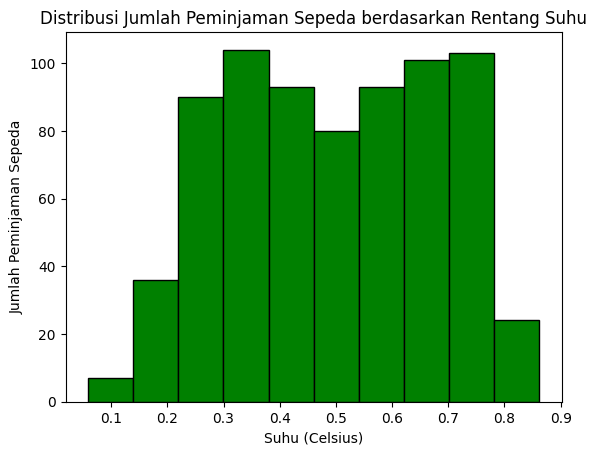

In [254]:
plt.hist(day_df['temp'], color='green', edgecolor='black')
plt.title('Distribusi Jumlah Peminjaman Sepeda berdasarkan Rentang Suhu')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Peminjaman Sepeda')

plt.show()

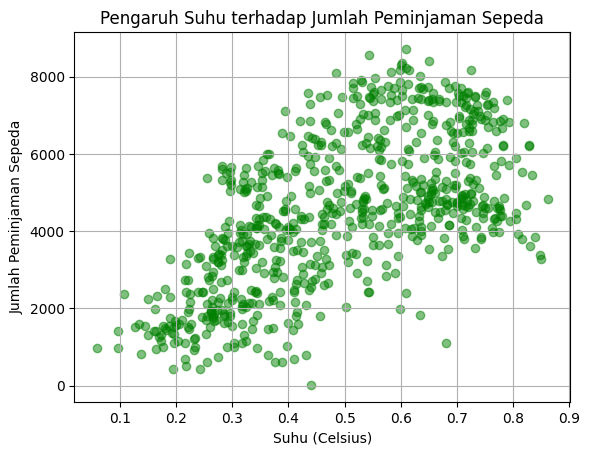

In [255]:
plt.scatter(day_df['temp'], day_df['cnt'], color='green', alpha=0.5)
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.grid(True)
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Musim Fall (Gugur) memiliki jumlah peminjam sepeda terbanyak.
> *   Jumlah peminjaman sepeda tertinggi terjadi pada musim gugur, diikuti oleh musim panas, musim dingin, dan musim semi.
> *   Musim gugur memiliki jumlah peminjaman sepeda yang tinggi karena cuaca yang hangat dan nyaman untuk bersepeda.


- Conclution pertanyaan 2 : Holiday / bukan Working Day (Hari libur/ bukan hari kerja) memiliki jumlah peminjam sepeda terbanyak.
> *   Jumlah peminjaman sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur mungkin karena orang-orang menggunakan sepeda sebagai sarana transportasi sehari-hari untuk pergi bekerja atau sekolah.
> *   Pada hari libur, aktivitas penggunaan sepeda mungkin lebih bergantung pada rekreasi atau kegiatan khusus, atau mungkin orang banyak menghabiskan waktu dirumah dan tidak beraktivitas keluar.

-  Conlution pertanyaan 3 : Suhu 0.4 - 0.7 merupakan range suhu yang memiliki peminjaman sepeda yang lebih banyak.
> *   Jumlah peminjaman sepeda cenderung meningkat pada suhu keadaan sedang (tidak terlalu dingin dan tidak terlalu panas) karena pengguna sepeda mengutamakan kenyamanan






